In [40]:
from scipy.io import wavfile
from sklearn.utils import resample
import numpy as np
import librosa
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import matplotlib.pyplot as plt

Mounted at /content/gdrive


In [41]:
# 모듈 로딩 후 오디오 추출
import moviepy.editor as mp

In [ ]:
import scipy.io as sio
import scipy.io.wavfile
import matplotlib.pyplot as plt

import sounddevice as sd

  y, sr = librosa.load(wav, sr=16000)

	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



file_dir: /content/gdrive/MyDrive
file_id: 멀티모달.mp4


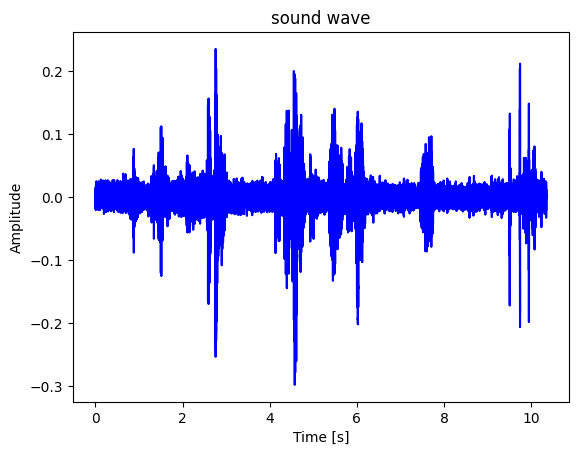

5.1733125


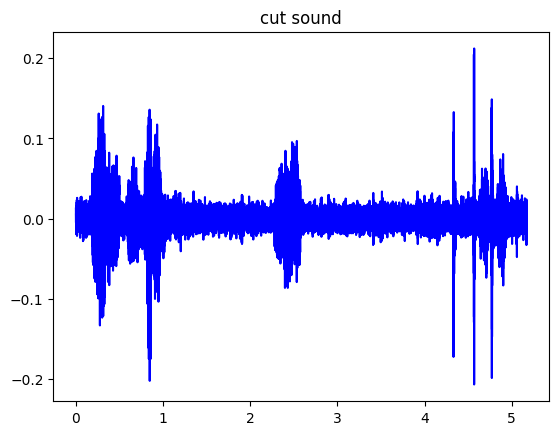

In [75]:
import soundfile

wav = '/content/gdrive/MyDrive/멀티모달.mp4'
(file_dir, file_id) = os.path.split(wav)
print("file_dir:", file_dir)
print("file_id:", file_id)

# original
y, sr = librosa.load(wav, sr=16000)
time = np.linspace(0, len(y)/sr, len(y)) # time axis
fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title("sound wave") # 제목
plt.savefig("sound wave"+'.png')
plt.show()


# cut 1/n and save (여기선 반 만큼만 잘랐음)
half = len(y)/2
y2 = y[round(half):]
time2 = np.linspace(0, len(y2)/sr, len(y2))
print(len(y2)/sr)
fig2, ax2 = plt.subplots()
ax2.plot(time2, y2, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('cut '+'sound')
plt.savefig('cut_5s '+'sound'+'.png')
plt.show()


# test2.wav라는 이름으로 반 자른 음성 파일 저장
soundfile.write('/content/gdrive/MyDrive/test2.wav', 
                y2, 
                16000, 
                format='WAV')

# 짤린 음원 길이만큼 들려줌
t, tt = librosa.load('/content/gdrive/MyDrive/test2.wav', sr = 44100, duration = len(y2)/sr)
IPython.display.Audio(data = t, rate = tt)

In [60]:
pip install resampy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 37.1 MB/s eta 0:00:00


Wav length: 5.1733125, Mel_S shape:(40, 518)


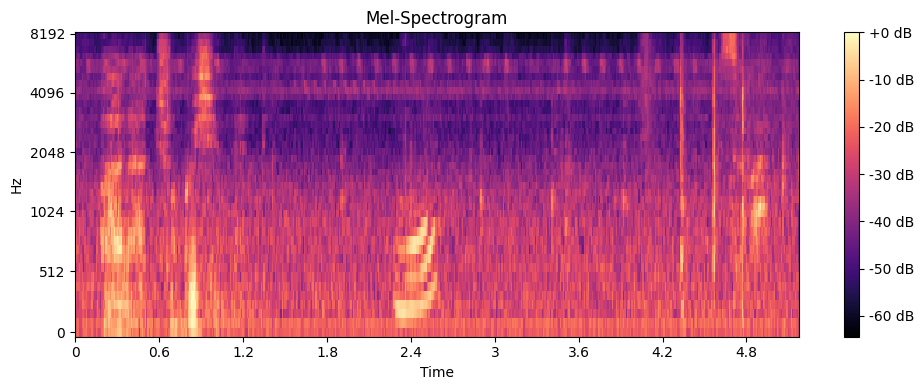

In [74]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

frame_length = 0.025
frame_stride = 0.010

def Mel_S(wav_file):
    # mel-spectrogram
    y, sr = librosa.load(wav_file, sr=16000)

    # wav_length = len(y)/sr
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))

    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

    print("Wav length: {}, Mel_S shape:{}".format(len(y)/sr,np.shape(S)))


    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-Spectrogram')
    plt.tight_layout()
    plt.savefig('Mel-Spectrogram example.png')
    plt.show()

    return S

man_original_data = '/content/gdrive/MyDrive/test2.wav'
mel_spec = Mel_S(man_original_data)